In [27]:
import pandas as pd
import numpy as np
rng = np.random.default_rng()


In [28]:
path = 'data4/22_sim_10000_1000_50_0.5_0_0.5_0.1/set_1/'

df = pd.read_csv(path + 'data.csv')
df_true = pd.read_csv(path + 'data_latent.csv')

In [29]:
x_latent = df_true.iloc[:, :-1].to_numpy()
x = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [30]:
from Lin_regression import LinRegression
from sklearn.decomposition import FactorAnalysis
# del fa  # fa is not defined yet in this cell

In [31]:
fa = FactorAnalysis(n_components=50, random_state=0)
fa.fit(x)
x_fa = fa.transform(x)
x_rand = rng.normal(size=x.shape)
x_dict = {
        'x': x,
        'x_fa': x_fa,
        'x_latent': x_latent,
        'x_rand': x_rand
        }

lr = LinRegression(x_dict, y)
scores = lr.get_scores()
print(pd.DataFrame(scores).T)

                  mse       rmse        mae        r2  adjusted_r2
x           22.781228   4.772968   3.747803  0.984238     0.982487
x_fa      1296.910880  36.012649  28.790252  0.102709     0.098200
x_latent     0.986623   0.993289   0.793214  0.999317     0.999314
x_rand    1294.779780  35.983049  28.729364  0.104184     0.004638


In [32]:
lr.get_coefficients()['x_latent'].size

50

In [33]:
path = 'data4/13_sim_10000_100_15_0.35_0.35_0.8_0.1/set_1/'

df = pd.read_csv(path + 'data_A.csv')
(df.std(axis=0)==0.0).sum()

np.int64(1)

In [34]:
beta = np.array([
    -0.219406,0.460522,0.255287,-0.613326,-0.227535,
    -1.249050,-0.896637,2.224500,-0.355701,-1.044193,
    -0.198472,-0.694477,0.067321,0.059018,0.038153
])

In [35]:
beta_nl = beta[:-4]
beta_l = beta[-4:]
print(beta_nl)
print(beta_l)

np.linalg.norm(beta_nl)/np.linalg.norm(beta_l)

[-0.219406  0.460522  0.255287 -0.613326 -0.227535 -1.24905  -0.896637
  2.2245   -0.355701 -1.044193 -0.198472]
[-0.694477  0.067321  0.059018  0.038153]


np.float64(4.353870461585577)

In [36]:
import matplotlib.pyplot as plt
import nonLinFunc

In [37]:
list_of_functions = [
            nonLinFunc.polynomial,
            nonLinFunc.exp,
            nonLinFunc.log,
            nonLinFunc.smooth_abs,
            nonLinFunc.tanh,
            nonLinFunc.sigmoid,
            nonLinFunc.sin,
            nonLinFunc.cos
        ]

possible_params = [
            (2, 5),  # polynomial degree
            (-2, 2),  # exp coefficient
            (0.01, 1),  # log epsilon
            (0.01, 1),  # smooth_abs epsilon
            None,  # tanh has no parameters
            None,  # sigmoid has no parameters
            None,  # sin has no parameters
            None   # cos has no parameters
        ]

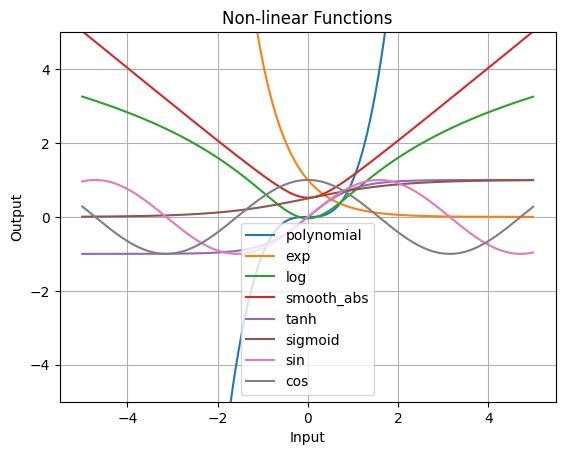

In [38]:
x = np.arange(-5, 5, 1e-2)
for f, p in zip(list_of_functions, possible_params):
    if f == nonLinFunc.polynomial:
        p = rng.integers(*possible_params[0])
        plt.plot(x, f(x, p), label=f.__name__)
    elif f == nonLinFunc.exp:
        p = rng.uniform(*possible_params[1])
        plt.plot(x, f(x, p), label=f.__name__)
    elif f == nonLinFunc.log:
        p = rng.uniform(*possible_params[2])
        plt.plot(x, f(x, p), label=f.__name__)
    elif f == nonLinFunc.smooth_abs:
        p = rng.uniform(*possible_params[3])
        plt.plot(x, f(x, p), label=f.__name__)
    else:
        plt.plot(x, f(x), label=f.__name__)

plt.legend()
plt.title("Non-linear Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.ylim(-5, 5)
plt.grid()
plt.show()


In [39]:
x_nl = x[:,:75]
x_l = x[:,75:]

x_dict = {
    'x': x,
    'x_nl': x_nl,
    'x_l': x_l
}

lr = LinRegression(x_dict, y)

scores = lr.get_scores()
df = pd.DataFrame(scores).T
print(df)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed